# Predict analytics on HR data of an organization

In [3]:
import smtplib
from matplotlib import style
import seaborn as sns
sns.set(style='ticks', palette='RdBu')
import pandas as pd
import numpy as np
import time
import datetime 
%matplotlib inline
import matplotlib.pyplot as plt
from subprocess import check_output
pd.options.display.max_colwidth = 1000
from time import gmtime, strftime
Time_now = strftime("%Y-%m-%d %H:%M:%S", gmtime())
import timeit
start = timeit.default_timer()
pd.options.display.max_rows = 100
from wordcloud import WordCloud
import sqlite3
import nltk
import string
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')
from sklearn.feature_selection.univariate_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import random
import itertools
import sys
import os
import argparse
from sklearn.pipeline import Pipeline
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
import six
from abc import ABCMeta
from scipy import sparse
from scipy.sparse import issparse
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import check_X_y, check_array
from sklearn.utils.extmath import safe_sparse_dot
from sklearn.preprocessing import normalize, binarize, LabelBinarizer
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV, SelectKBest
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn import svm
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

path = 'C:/Users/rmalshe/Desktop/CareerDevelopment/PROGRAMMING_LANGUAGES/iPythonNotebooks/'

# First, just describe the data and see how they look like. What their averages, standard deviations are. 

In [45]:
df = pd.read_csv(path+'HR_comma_sep.csv')
df.head()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


# Next, create some pivot tables, which give a very quick view over various dimensions. 

In [46]:
df_jobtype = pd.pivot_table(df,
                        values = ['satisfaction_level', 'last_evaluation'],
                        index = ['sales'],
                        columns = [],aggfunc=[np.mean], 
                        margins=True).fillna('')

#cm = sns.light_palette("green", as_cmap=True)
cm = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True, center="light")
df_jobtype.style.background_gradient(cmap=cm)

In [47]:
df_jobtype_salary = pd.pivot_table(df,
                        values = ['satisfaction_level', 'last_evaluation'],
                        index = ['sales', 'salary'],
                        columns = [],aggfunc=[np.mean], 
                        margins=True).fillna('')
#cm = sns.light_palette("green", as_cmap=True)
cm = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True, center="light")
df_jobtype_salary.style.background_gradient(cmap=cm)

In [48]:
#df_jobtype_salary_prom = pd.pivot_table(df,
#                        values = ['satisfaction_level', 'last_evaluation'],
#                        index = ['sales','promotion_last_5years', 'salary'],
#                        columns = [],aggfunc=[np.mean], 
#                        margins=True).fillna('')
#
#cm = sns.light_palette("green", as_cmap=True)
#df_jobtype_salary_prom.style.background_gradient(cmap=cm)

In [49]:
df_jobtype_prom = pd.pivot_table(df,
                        values = ['satisfaction_level', 'last_evaluation'],
                        index = ['sales','promotion_last_5years'],
                        columns = [],aggfunc=[np.mean], 
                        margins=True).fillna('')

#cm = sns.light_palette("green", as_cmap=True)
cm = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True, center="light")
df_jobtype_prom.style.background_gradient(cmap=cm)

In [50]:
#df_jobtype_salary_time = pd.pivot_table(df,
#                        values = ['satisfaction_level', 'last_evaluation'],
#                        index = ['sales','time_spend_company', 'salary'],
#                        columns = [],aggfunc=[np.mean], 
#                        margins=True).fillna('')
#cm = sns.light_palette("green", as_cmap=True)
#df_jobtype_salary_time.style.background_gradient(cmap=cm)

# Then create some plots to get some trends out of the data. 

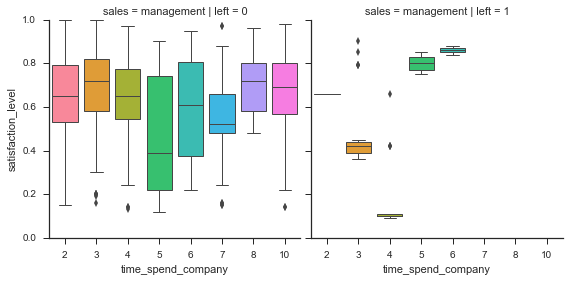

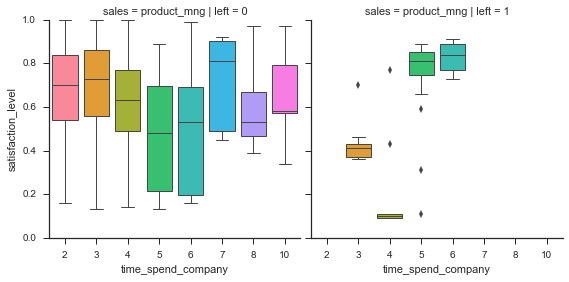

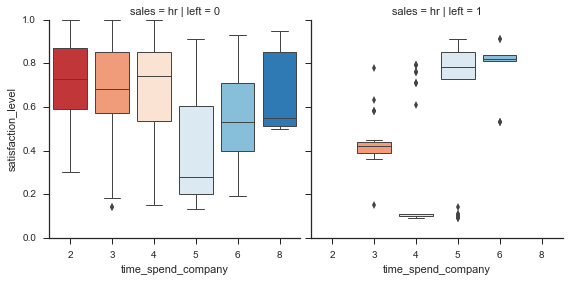

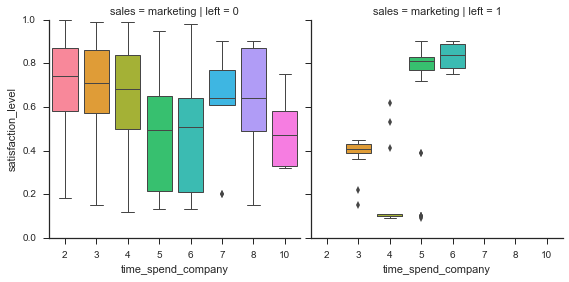

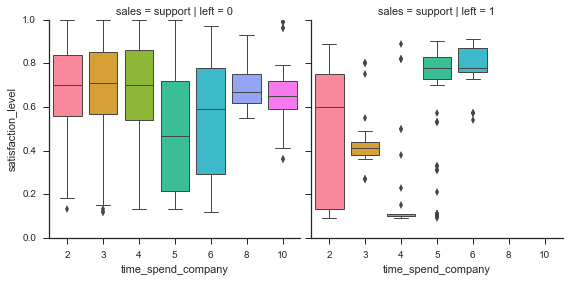

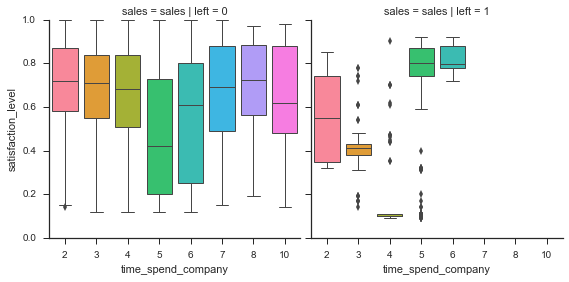

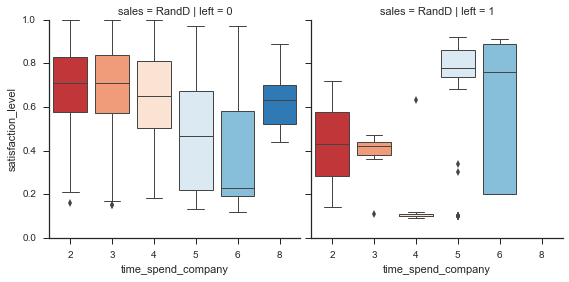

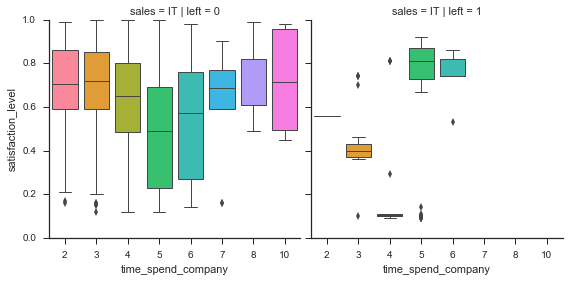

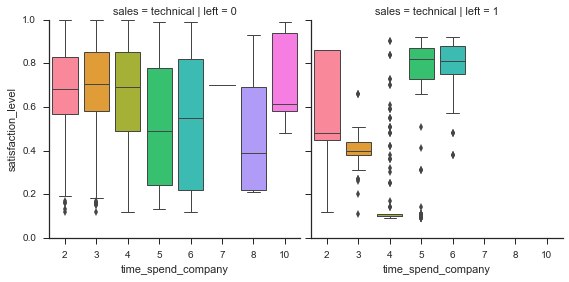

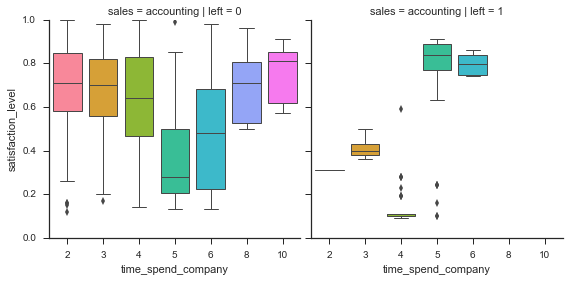

In [51]:
for i in set(df['sales']):
    aa= df[df['sales'].isin([i])]
    g = sns.factorplot(x='time_spend_company', y="satisfaction_level",data=aa, 
                   saturation=1, kind="box", col = 'left', row = 'sales',
                   ci=None, aspect=1, linewidth=1) 

Note in the data above that for the employees who left, there is a sharp decline at the forth year. We are now getting some trends out of the data. 

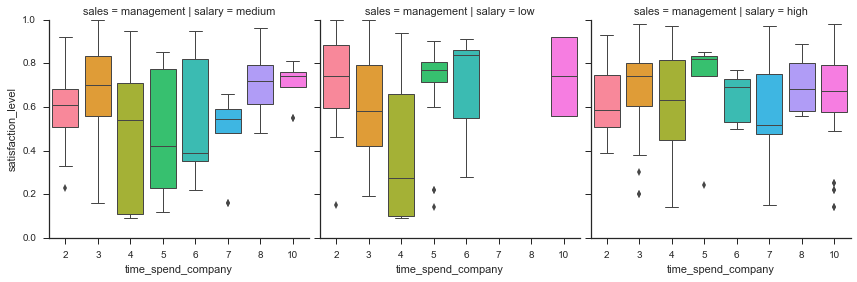

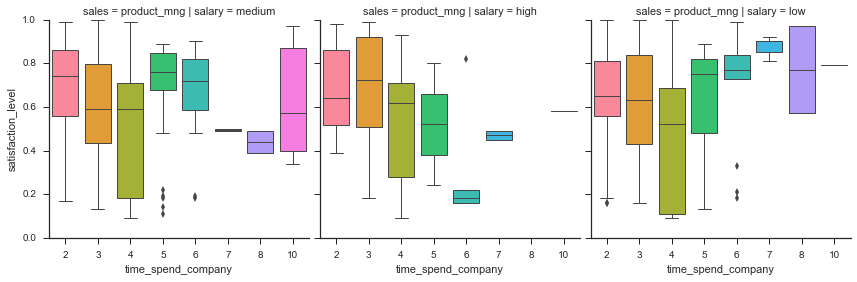

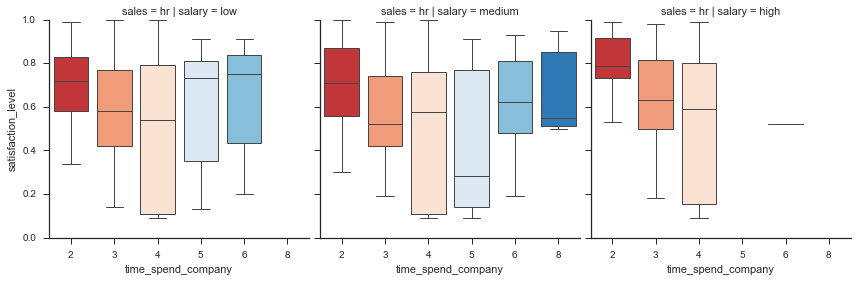

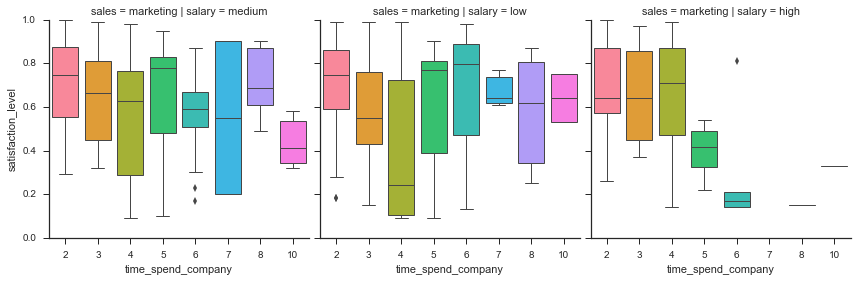

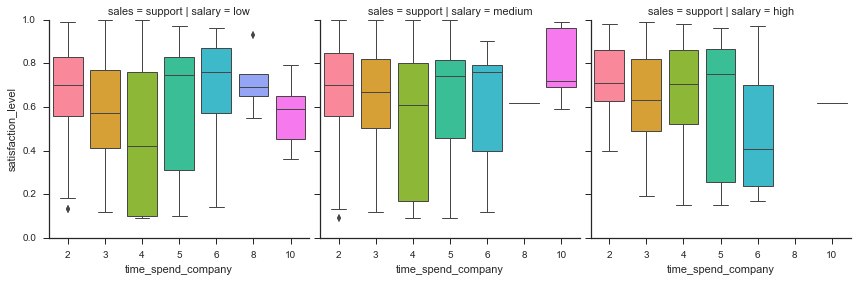

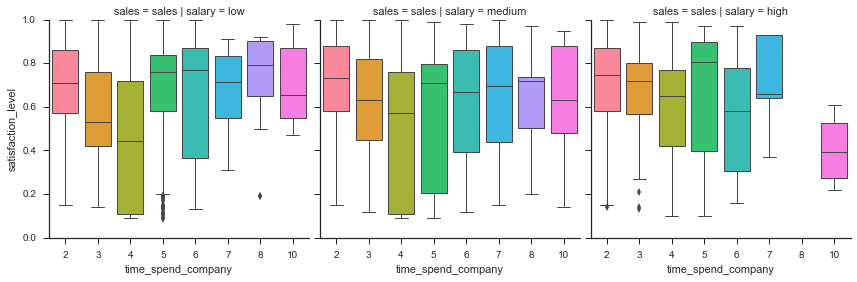

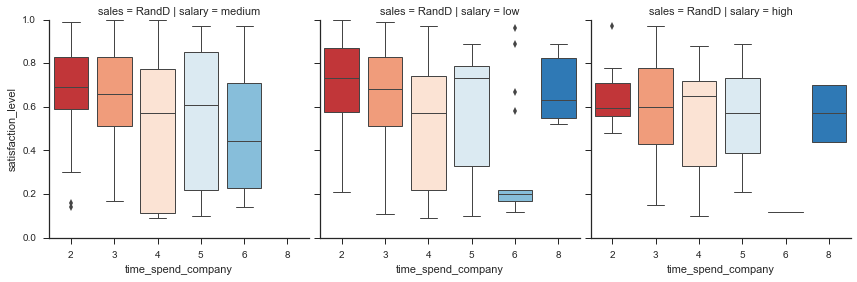

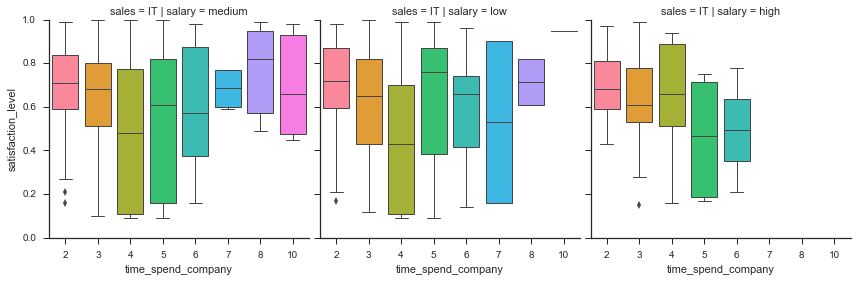

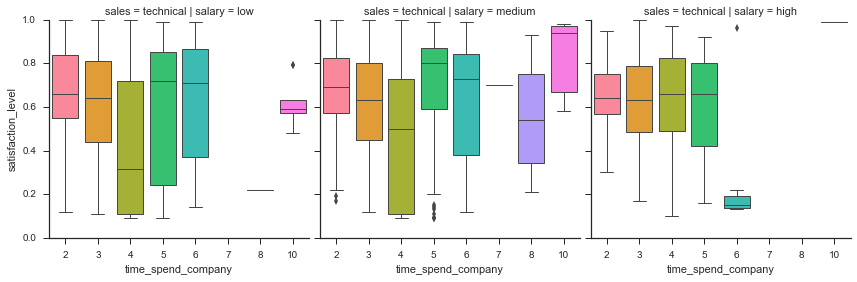

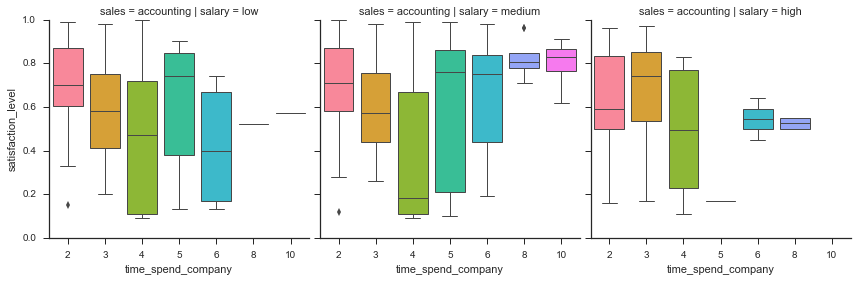

In [52]:
for i in set(df['sales']):
    aa= df[df['sales'].isin([i])]
    g = sns.factorplot(x='time_spend_company', 
                       y="satisfaction_level",
                       data=aa,
                       saturation=1,
                       kind="box", 
                       col='salary', 
                       row='sales', 
                       ci=None, 
                       aspect=1, 
                       linewidth=1) 

In [53]:
#for i in set(df['sales']):
#    aa= df[df['sales'].isin([i])]
#    g = sns.factorplot(x='left', 
#                       y="satisfaction_level",
#                       data=aa,
#                       saturation=1, 
#                       kind="box", 
#                       col = 'salary',
#                       row='sales',
#                       ci=None, 
#                       aspect=1, 
#                       linewidth=1) 

# We can now look at how the variables are correlated. 

In [54]:
variable_correlations = df.corr()
variable_correlations

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


# Plot a heat map of correlations. 

In [55]:
def heat_map(corrs_mat):
    sns.set(style="white")
    f, ax = plt.subplots(figsize=(11, 9))
    mask = np.zeros_like(corrs_mat, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True 
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corrs_mat, mask=mask, cmap=cmap, ax=ax)

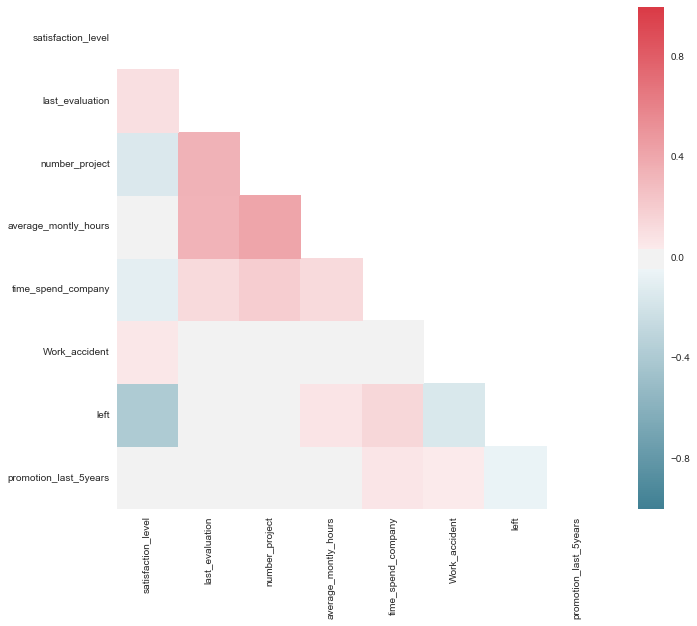

In [56]:
heat_map(variable_correlations)

What we can see is that there is a negative correlation between employees who left, and there is positive correlation between monthly hours, number of projects, and time spent in company. Therefore we can plot correlations of the same variables for the dataset that represents employees that left.  

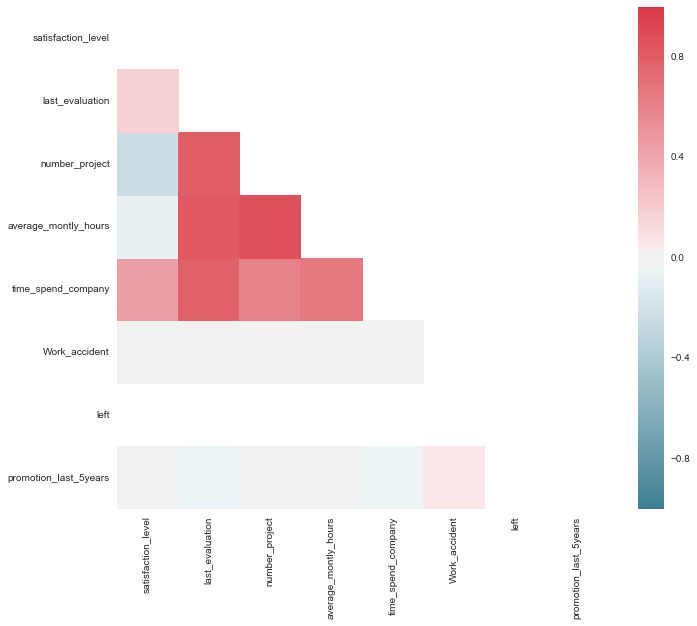

In [57]:
df_left = df[df['left']==1]
reduced_variable_correlations = df_left.corr()
reduced_variable_correlations
heat_map(reduced_variable_correlations)

It can be seen that the correlations get very strong for monthly hours, number of projects, and time spent in company. This simply shows that there has to be sharper trends if we used these variables to plot some trends. 

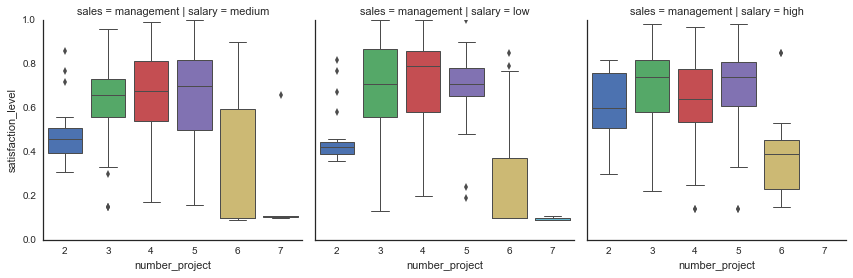

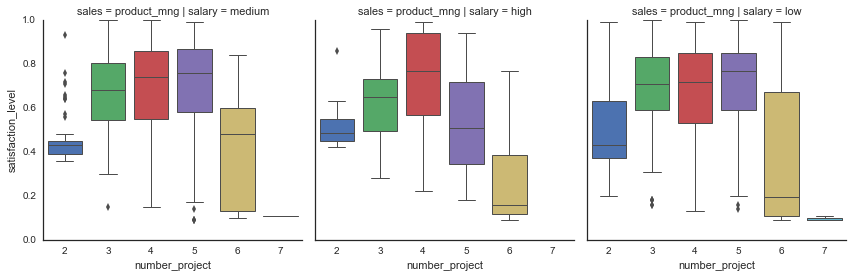

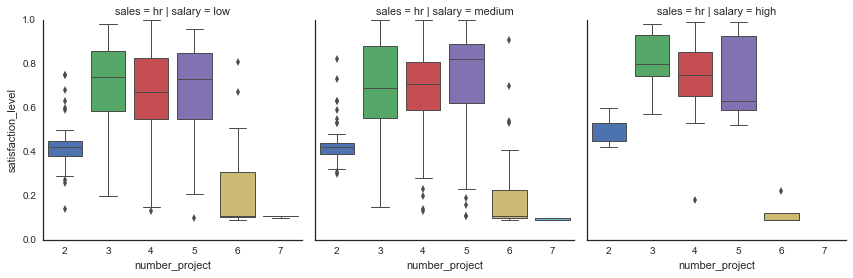

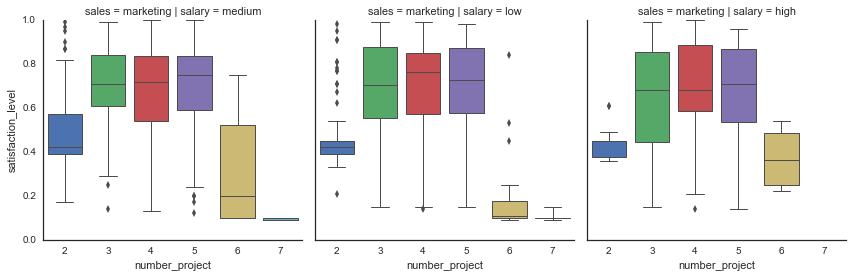

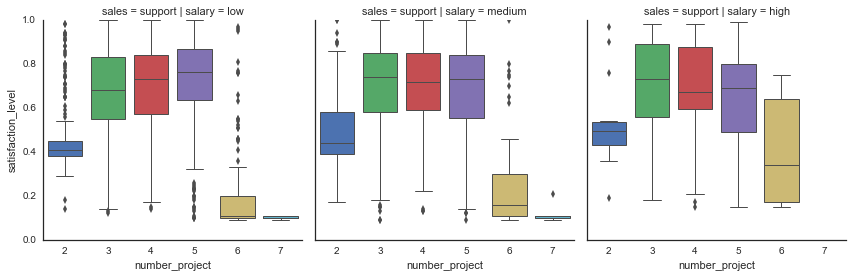

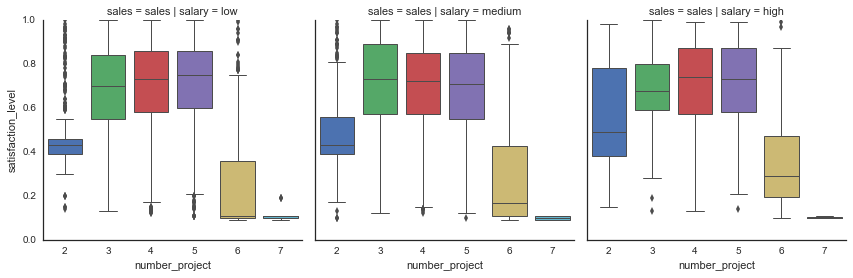

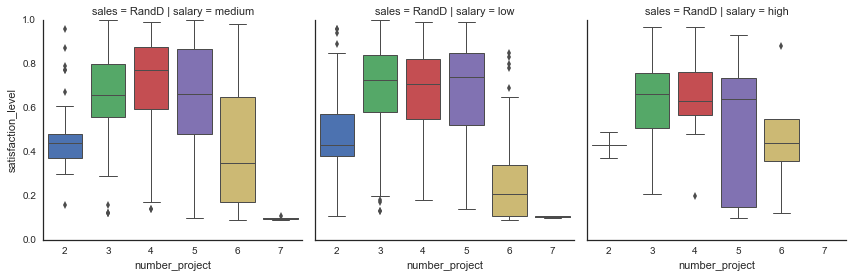

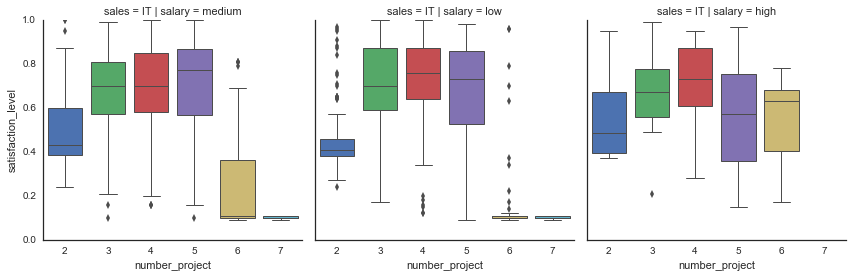

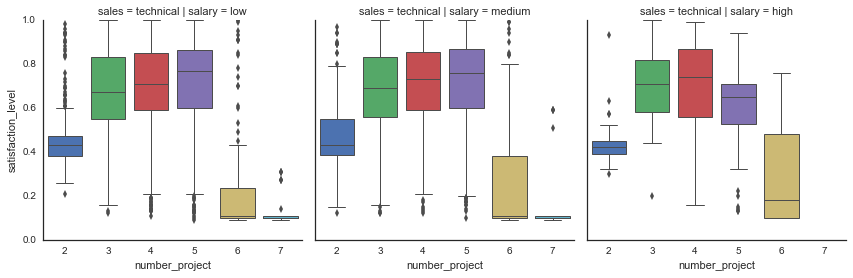

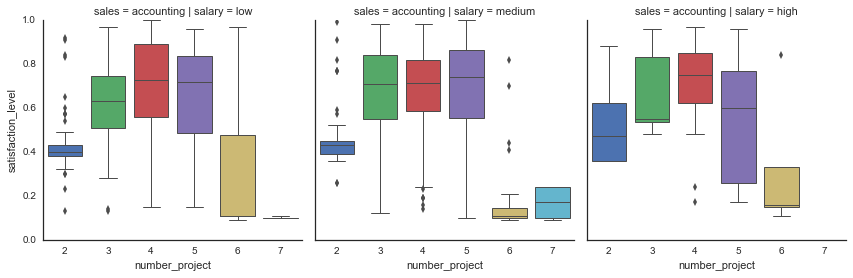

In [58]:
for i in set(df['sales']):
    aa= df[df['sales'].isin([i])]
    g = sns.factorplot(x='number_project', y="satisfaction_level",data=aa, 
                   saturation=1, kind="box", col = 'salary', row='sales', 
                   ci=None, aspect=1, linewidth=1) 

As soon as we plot departments, salaries, and number of projects, it is very clear, that people who do more than 5 projects are not satisfied at all, because there is a very significant rise in their work hours. We can therefore plot the number of hours worked for employees that stayed vs employees that left. 

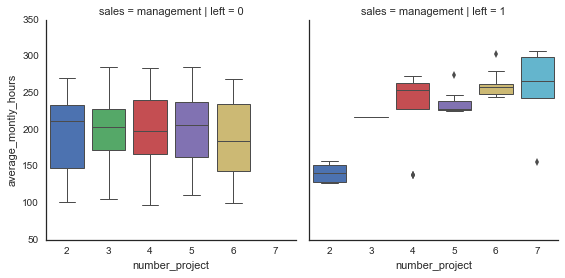

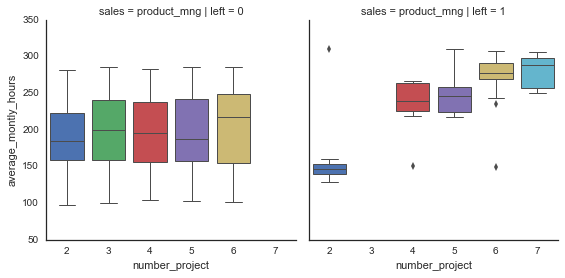

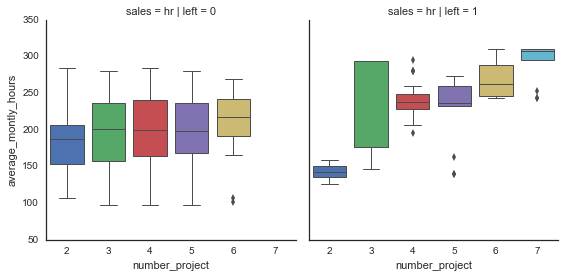

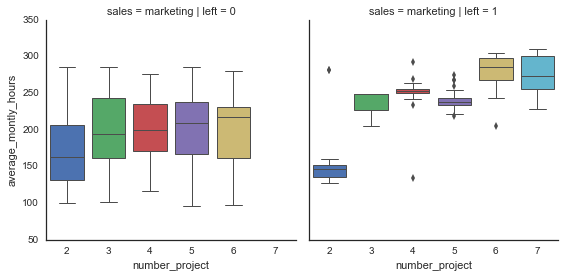

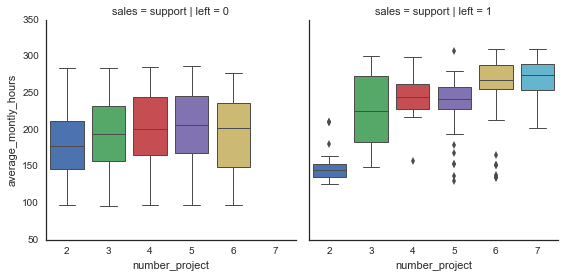

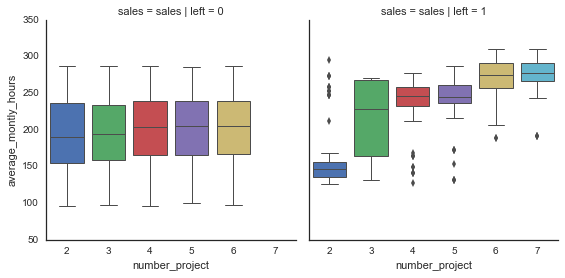

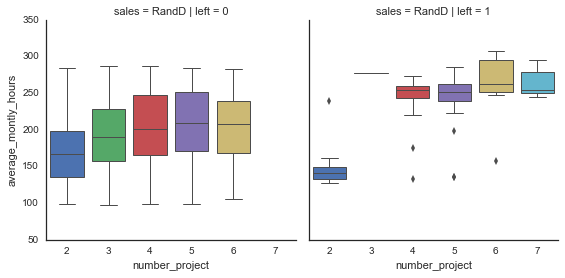

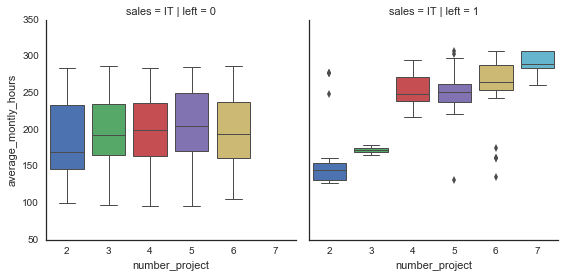

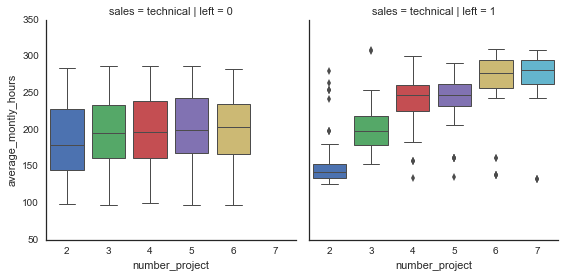

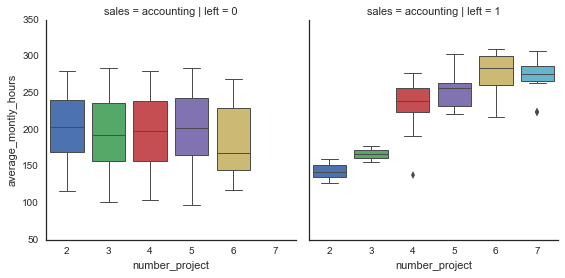

In [59]:
for i in set(df['sales']):
    aa= df[df['sales'].isin([i])]
    g = sns.factorplot(x='number_project', y="average_montly_hours",data=aa, 
                   saturation=1, kind="box", col = 'left', row='sales', 
                   ci=None, aspect=1, linewidth=1) 

From these plots it is very clear, that employees who left were having to work significanly longer to achieve the same results as the employees who stayed. We can then plot trends of average monthly hours, projects done, and whether employees got promotions. 

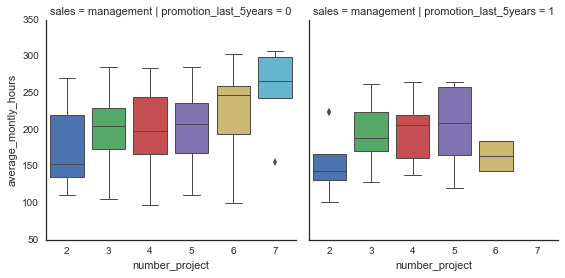

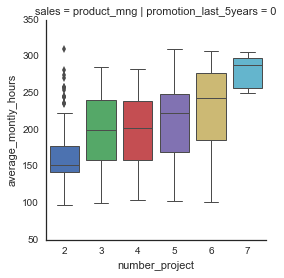

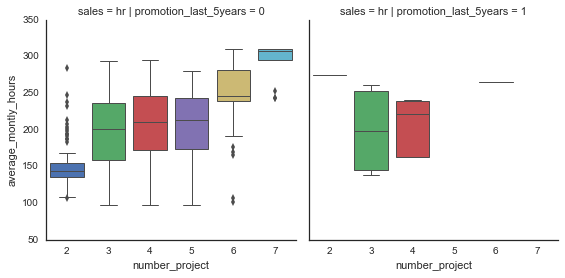

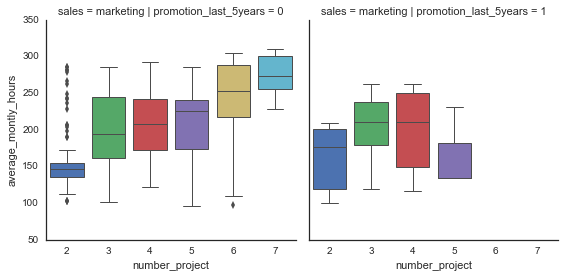

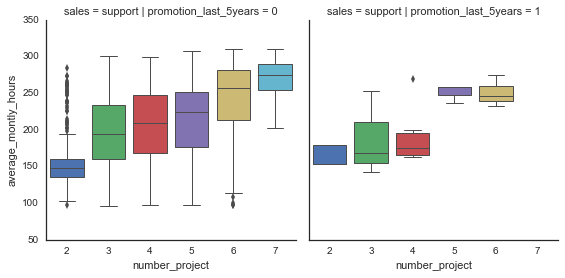

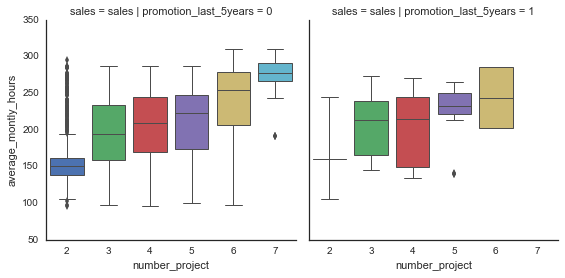

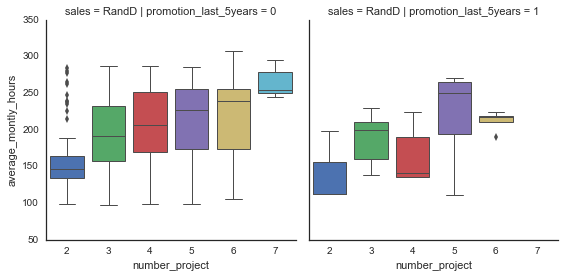

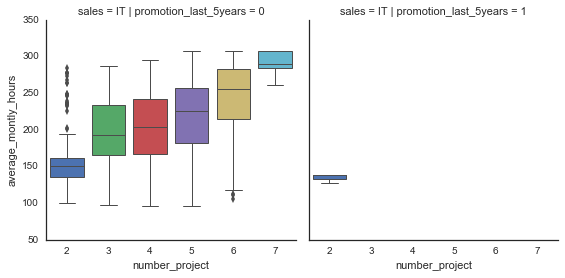

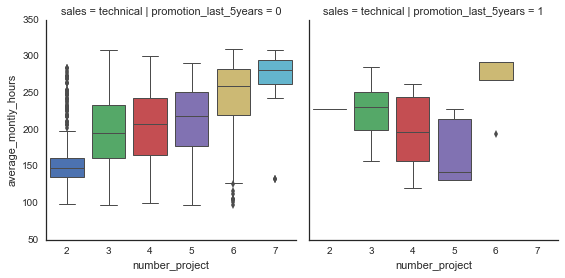

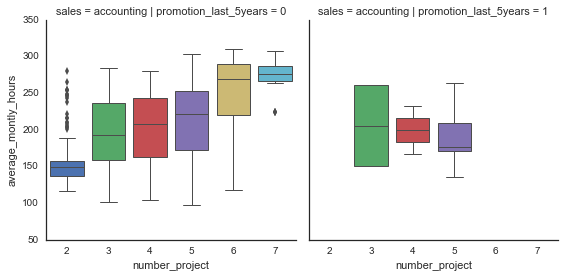

In [60]:
for i in set(df['sales']):
    aa= df[df['sales'].isin([i])]
    g = sns.factorplot(x='number_project', y="average_montly_hours",data=aa, 
                   saturation=1, kind="box", col = 'promotion_last_5years', row='sales', 
                   ci=None, aspect=1, linewidth=1) 

# Clearly, if the employees worked hard, and did not get promotions, they were more likely to leave.

# We can now plot pairplots of the variables and see the same trends. 

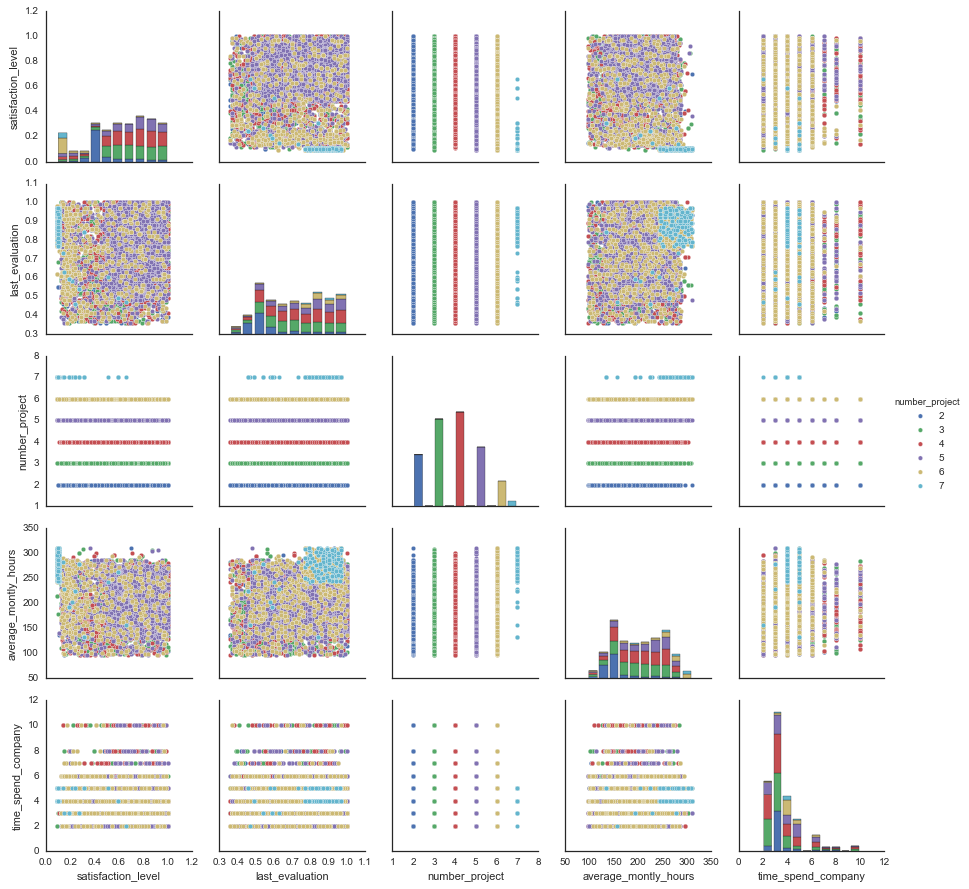

In [61]:
df_small = df[['satisfaction_level', 
                   'last_evaluation', 
                   'number_project',
                   'average_montly_hours', 
                   'time_spend_company']]
sns.pairplot(df_small, hue="number_project")

In [62]:
#g = sns.PairGrid(df_small, diag_sharey=False)
#g.map_lower(sns.kdeplot, cmap="Blues_d")
#g.map_upper(plt.scatter)
#g.map_diag(sns.kdeplot, lw=3)

In [63]:
df.columns

Index([u'satisfaction_level', u'last_evaluation', u'number_project',
       u'average_montly_hours', u'time_spend_company', u'Work_accident',
       u'left', u'promotion_last_5years', u'sales', u'salary'],
      dtype='object')

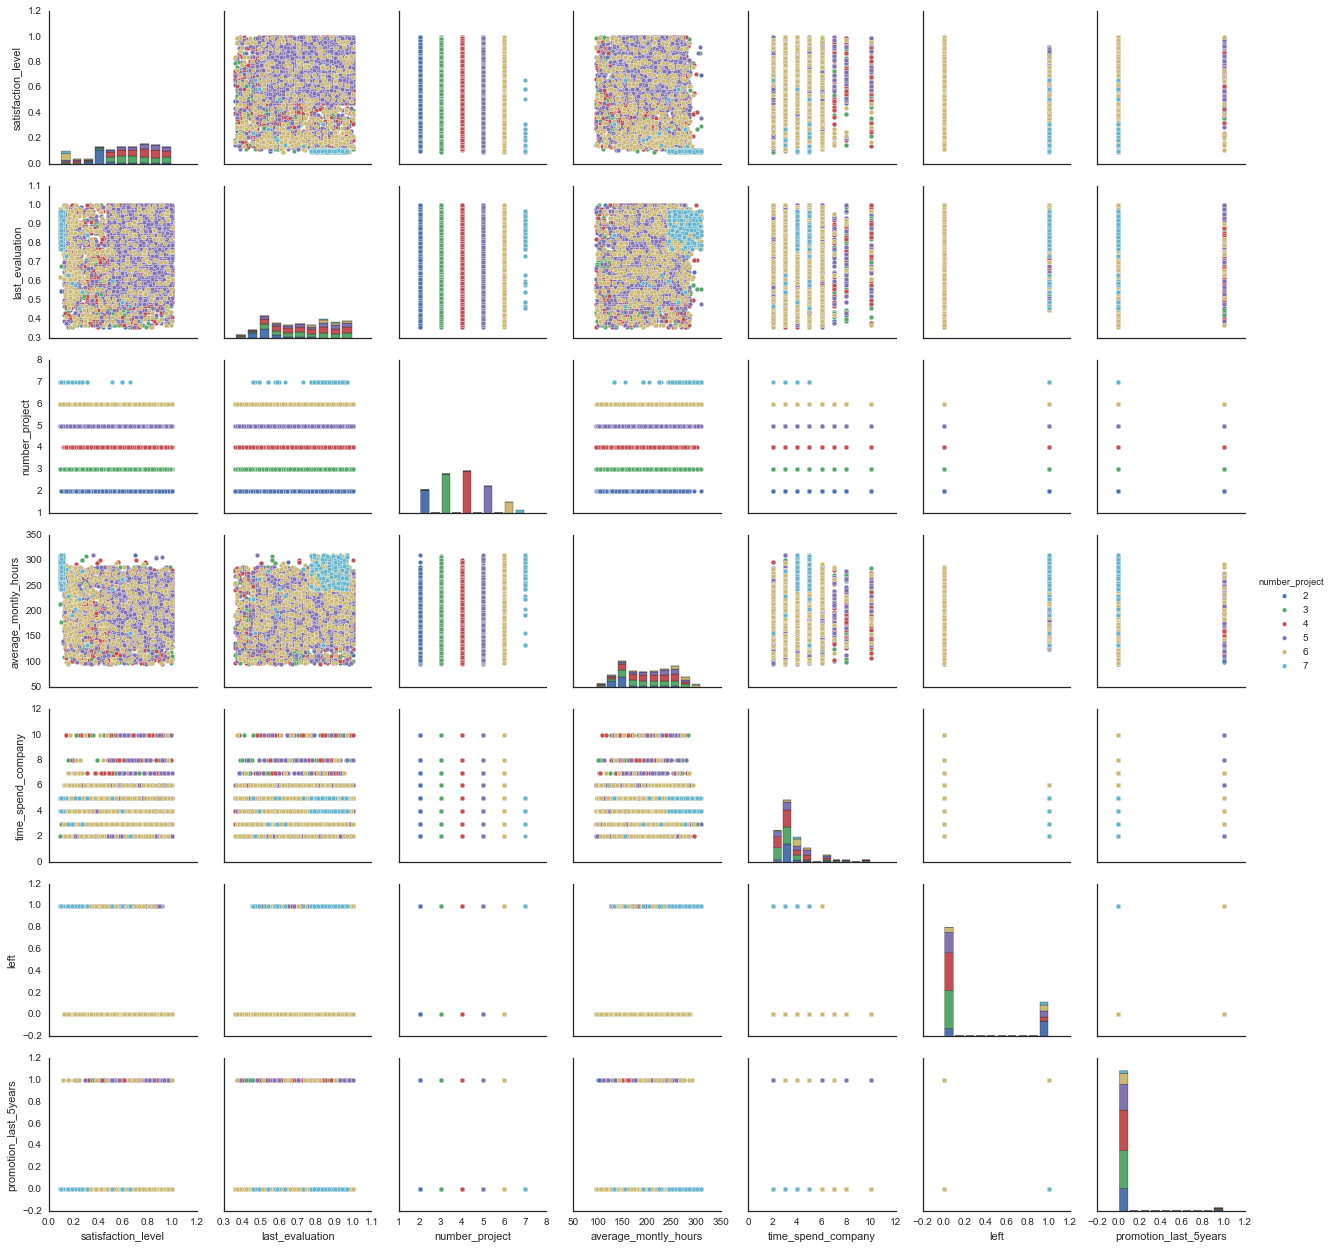

In [64]:
df_small = df[['satisfaction_level', 
               'last_evaluation', 
               'number_project',
               'average_montly_hours', 
               'time_spend_company', 
               'left', 
               'promotion_last_5years' 
]]
sns.pairplot(df_small, hue="number_project")

# Can we predict who would leave?
To achieve this, we need to come up with a classifier. We would split our data into two sets, and run the classifier on training and test set. If the accuracy of the classifier is very high, then it can be easily predicted who would leave the company. 

In [65]:
df=pd.read_csv(path+'HR_comma_sep.csv')
df.columns = ['satisfaction_level', 
              'last_evaluation', 
              'number_project',
              'average_montly_hours', 
              'time_spend_company', 
              'Work_accident', 
              'left',
              'promotion_last_5years', 
              'department', 
              'salary']
mod_df = df 

We will choose the common classifiers here. 

In [66]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV, SelectKBest

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

classifiers = [('RandomForestClassifierG', RandomForestClassifier(n_jobs=-1, criterion='gini')),
               ('RandomForestClassifierE', RandomForestClassifier(n_jobs=-1, criterion='entropy')),
               ('AdaBoostClassifier', AdaBoostClassifier()),
               ('ExtraTreesClassifier', ExtraTreesClassifier(n_jobs=-1)),
               ('KNeighborsClassifier', KNeighborsClassifier(n_jobs=-1)),
               ('DecisionTreeClassifier', DecisionTreeClassifier()),
               ('ExtraTreeClassifier', ExtraTreeClassifier()),
               ('LogisticRegression', LogisticRegression()),
               ('GaussianNB', GaussianNB()),
               ('BernoulliNB', BernoulliNB())
              ]
allscores = []

salary_groups = {'low': 0, 'medium': 1, 'high': 2}

department_groups = {'sales': 1, 
                     'marketing': 2, 
                     'product_mng': 3, 
                     'technical': 4, 
                     'IT': 5, 
                     'RandD': 6, 
                     'accounting': 7, 
                     'hr': 8, 
                     'support': 9, 
                     'management': 10 
                    }


mod_df.salary = mod_df.salary.map(salary_groups)

mod_df['deptgrps'] = mod_df.department.map(department_groups)

for dept in mod_df.department.unique():
    mod_df['dept_'+dept] = (mod_df.department == dept).astype(int)
mod_df = mod_df.drop('department', axis=1)

x, Y = mod_df.drop('left', axis=1), mod_df['left']
for name, classifier in classifiers:
    scores = []
    for i in range(3): # three runs
        roc = cross_val_score(classifier, x, Y, scoring='roc_auc', cv=20)
        scores.extend(list(roc))
    scores = np.array(scores)
    print(name, scores.mean())
    new_data = [(name, score) for score in scores]
    allscores.extend(new_data)

('RandomForestClassifierG', 0.99107311509011597)
('RandomForestClassifierE', 0.99070737206624992)
('AdaBoostClassifier', 0.98242105133631696)
('ExtraTreesClassifier', 0.99000091729330164)
('KNeighborsClassifier', 0.97026405258461323)
('DecisionTreeClassifier', 0.97873033308864987)
('ExtraTreeClassifier', 0.96426899106924513)
('LogisticRegression', 0.81538779217444168)
('GaussianNB', 0.81493495150059292)
('BernoulliNB', 0.64083377318646251)


[None, None, None, None, None, None, None, None, None, None]

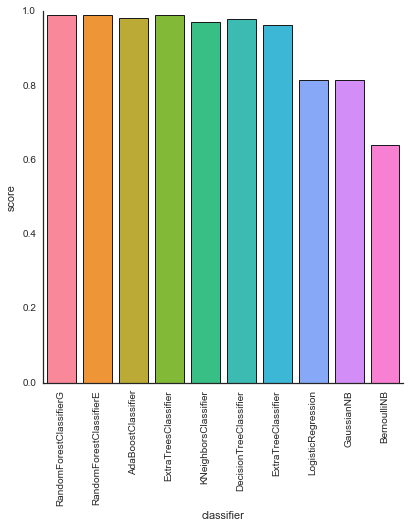

In [67]:
temp = pd.DataFrame(allscores, columns=['classifier', 'score'])
sns.factorplot(x='classifier', 
               y="score",data=temp, 
               saturation=1, 
               kind="bar", 
               ci=None, 
               aspect=1, 
               linewidth=1, size = 6) 
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

[None, None, None, None, None, None, None, None, None, None]

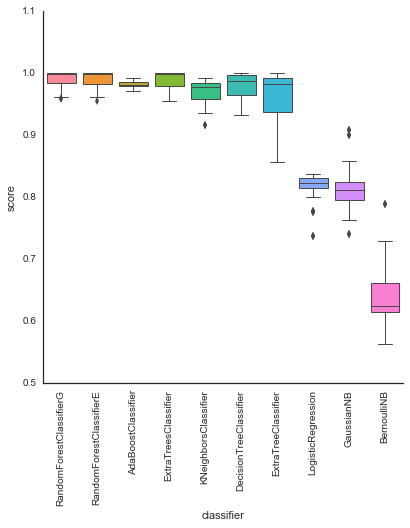

In [68]:
temp = pd.DataFrame(allscores, columns=['classifier', 'score'])
#sns.violinplot('classifier', 'score', data=temp, inner=None, linewidth=0.3)
sns.factorplot(x='classifier', 
               y="score",
               data=temp, 
               saturation=1, 
               kind="box", 
               ci=None, 
               aspect=1, 
               linewidth=1,
               size = 6)     
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

We can see that the classifiers yield very high scores, indicating it is easy to predict who would leave the company. 

In [69]:
x, Y = mod_df.drop('left', axis=1), mod_df['left']

for name, classifier in classifiers:
    scores = []
    for i in range(3): # three runs
        roc = cross_val_score(classifier, x, Y, scoring='roc_auc', cv=20)
        scores.extend(list(roc))
    scores = np.array(scores)
    print(name, scores.mean())
    new_data = [(name, score) for score in scores]
    allscores.extend(new_data)

('RandomForestClassifierG', 0.99160057074549668)
('RandomForestClassifierE', 0.99114124837989992)
('AdaBoostClassifier', 0.98242105133631696)
('ExtraTreesClassifier', 0.99026382931126589)
('KNeighborsClassifier', 0.97026405258461323)
('DecisionTreeClassifier', 0.97840107022899581)
('ExtraTreeClassifier', 0.96428430934690823)
('LogisticRegression', 0.81538779217444168)
('GaussianNB', 0.81493495150059292)
('BernoulliNB', 0.64083377318646251)


We can now look at the department level. It must be true that some departments would be more heavily paid than others. 

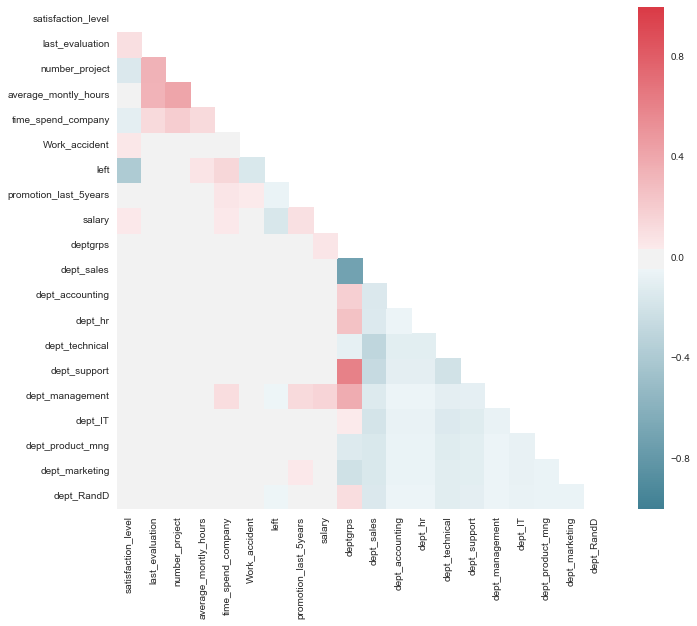

In [70]:
reduced_variable_correlations = mod_df.corr()
reduced_variable_correlations
heat_map(reduced_variable_correlations)

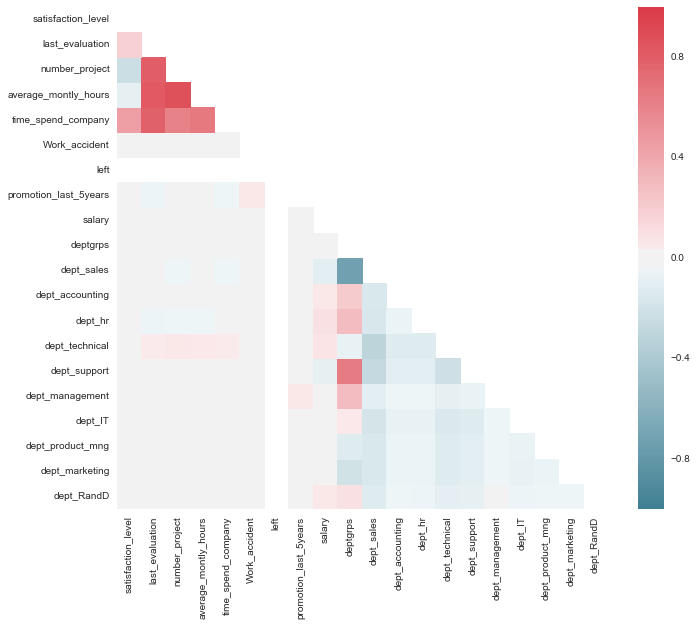

In [71]:
mod_df_left = mod_df[mod_df['left']==1]
reduced_variable_correlations = mod_df_left.corr()
reduced_variable_correlations
heat_map(reduced_variable_correlations)

In [72]:
x, Y = mod_df.drop('promotion_last_5years', axis=1), mod_df['promotion_last_5years']
for name, classifier in classifiers:
    scores = []
    for i in range(3): # three runs
        roc = cross_val_score(classifier, x, Y, scoring='roc_auc', cv=20)
        scores.extend(list(roc))
    scores = np.array(scores)
    print(name, scores.mean())
    new_data = [(name, score) for score in scores]
    allscores.extend(new_data)

('RandomForestClassifierG', 0.86481110921889193)
('RandomForestClassifierE', 0.86842359218891907)
('AdaBoostClassifier', 0.79119394300635781)
('ExtraTreesClassifier', 0.86174926203451419)
('KNeighborsClassifier', 0.84175053928247057)
('DecisionTreeClassifier', 0.8499105926430518)
('ExtraTreeClassifier', 0.85184207538601275)
('LogisticRegression', 0.78419022479564016)
('GaussianNB', 0.77889305177111712)
('BernoulliNB', 0.79482388169845586)


[None, None, None, None, None, None, None, None, None, None]

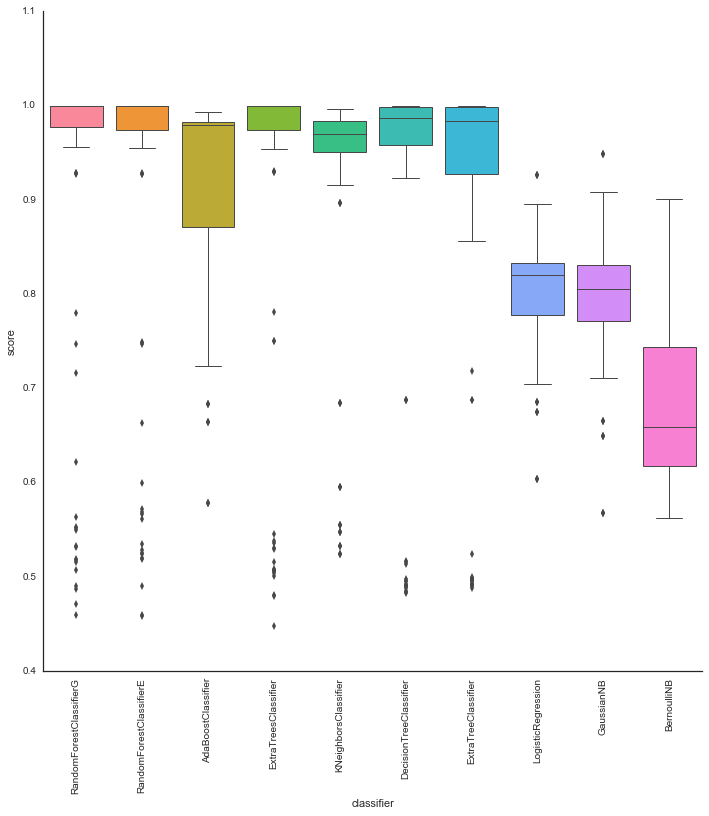

In [73]:
temp = pd.DataFrame(allscores, columns=['classifier', 'score'])
#sns.violinplot('classifier', 'score', data=temp, inner=None, linewidth=0.3)
plt.figure(figsize=(15,10))
sns.factorplot(x='classifier', 
               y="score",
               data=temp, 
               saturation=1, 
               kind="box", 
               ci=None, 
               aspect=1, 
               linewidth=1, 
               size = 10)     
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

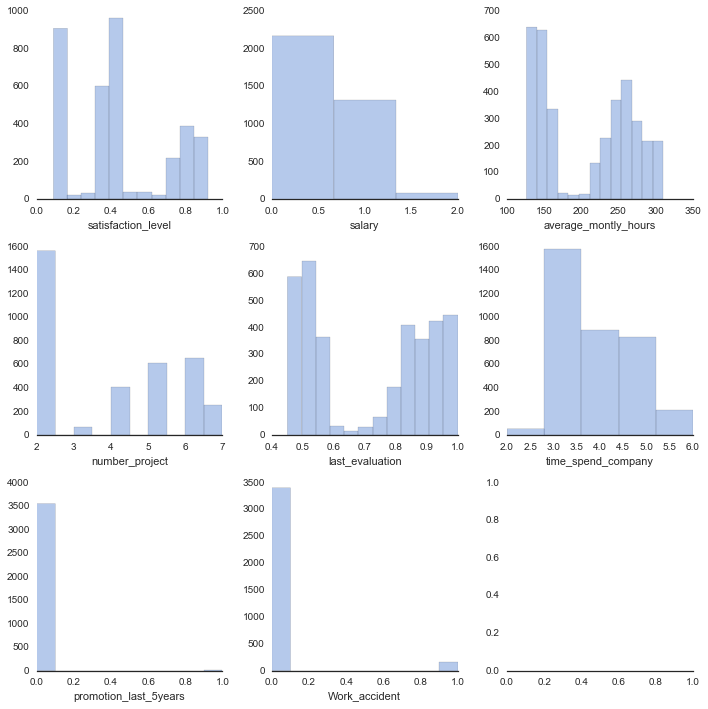

In [74]:
data = mod_df
sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 3, figsize=(10,10))
sns.despine(left=True)

#people that left
leavers = data.loc[data['left'] == 1]

# Plot a simple histogram with binsize determined automatically
sns.distplot(leavers['satisfaction_level'], kde=False, color="b", ax=axes[0,0])
sns.distplot(leavers['salary'], bins=3, kde=False, color="b", ax=axes[0, 1])
sns.distplot(leavers['average_montly_hours'], kde=False, color="b", ax=axes[0, 2])
sns.distplot(leavers['number_project'], kde=False, color="b", ax=axes[1,0])
sns.distplot(leavers['last_evaluation'], kde=False, color="b", ax=axes[1, 1])
sns.distplot(leavers['time_spend_company'], kde=False, bins=5, color="b", ax=axes[1, 2])
sns.distplot(leavers['promotion_last_5years'],bins=10, kde=False, color="b", ax=axes[2,0])
sns.distplot(leavers['Work_accident'], bins=10,kde=False, color="b", ax=axes[2, 1])

plt.tight_layout()

# Predict who will leave the job: Here is where datascience cracks a problem, in absolutely no time! 

In [75]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
#import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [76]:
df = pd.read_csv(path+'HR_comma_sep.csv')
df_copy = pd.get_dummies(df)
df_copy.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.80,0.86,5,262,6,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.11,0.88,7,272,4,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.72,0.87,5,223,5,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.37,0.52,2,159,3,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [77]:
df1 = df_copy
y = df1['left'].values
df1 = df1.drop(['left'],axis=1)
X = df1.values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.50)

In [78]:
radm = RandomForestClassifier()
radm.fit(Xtrain, ytrain)
y_val_l = radm.predict_proba(Xtest)
print("Validation accuracy: ", sum(pd.DataFrame(y_val_l).idxmax(axis=1).values
                                   == ytest)/len(ytest))
y_val_l

('Validation accuracy: ', 0)


array([[ 0. ,  1. ],
       [ 1. ,  0. ],
       [ 0.9,  0.1],
       ..., 
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 0.9,  0.1]])

In [79]:
clf = radm
indices = np.argsort(radm.feature_importances_)[::-1]

# Print the feature ranking
print('Feature ranking:')

for f in range(df1.shape[1]):
    print('%d. feature %d %s (%f)' % (f+1 , indices[f], df1.columns[indices[f]],
                                      radm.feature_importances_[indices[f]]))

Feature ranking:
1. feature 0 satisfaction_level (0.300555)
2. feature 2 number_project (0.204779)
3. feature 4 time_spend_company (0.193273)
4. feature 3 average_montly_hours (0.133813)
5. feature 1 last_evaluation (0.121689)
6. feature 5 Work_accident (0.007016)
7. feature 17 salary_high (0.006506)
8. feature 18 salary_low (0.006039)
9. feature 19 salary_medium (0.003390)
10. feature 14 sales_sales (0.003269)
11. feature 16 sales_technical (0.002656)
12. feature 15 sales_support (0.002586)
13. feature 9 sales_accounting (0.002127)
14. feature 11 sales_management (0.002036)
15. feature 6 promotion_last_5years (0.002025)
16. feature 7 sales_IT (0.001958)
17. feature 8 sales_RandD (0.001728)
18. feature 10 sales_hr (0.001556)
19. feature 12 sales_marketing (0.001532)
20. feature 13 sales_product_mng (0.001466)


# Predict who will leave soon

In [80]:
stay = df[df['left'] == 0]
stay_copy = pd.get_dummies(stay)

In [81]:
df1 = stay_copy
y = df1['left'].values
df1 = df1.drop(['left'],axis=1)
X = df1.values

In [82]:
pred = clf.predict_proba(X)

# tell me the # of employees will definitely leave

In [83]:
sum(pred[:,1]==1)

4

# show who will likely to leave with probability greater than or equal to 50%

In [84]:
stay['will leave the job'] = pred[:,1]
stay[stay['will leave the job']>=0.5]

C:\Users\rmalshe\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,will leave the job
2473,0.48,0.53,4,271,3,0,0,0,hr,low,0.5
2498,0.45,0.52,2,105,3,0,0,0,technical,low,0.7
2853,0.55,0.81,4,267,5,0,0,0,accounting,low,0.5
3038,0.12,0.78,6,260,5,0,0,0,management,medium,0.6
3780,0.86,0.96,5,238,5,0,0,0,technical,low,1.0
4519,0.44,0.45,2,124,3,0,0,0,sales,low,0.5
4801,0.17,0.91,4,260,5,0,0,0,product_mng,low,0.5
5104,0.38,0.50,2,170,3,0,0,0,product_mng,low,0.6
5384,0.36,0.60,2,136,6,0,0,0,technical,low,0.5
5431,0.70,0.95,5,234,6,1,0,0,sales,medium,0.6


# Conclusions
We have identified the root cause of the problem, the variables and their importance, and we have accurately predicted who would leave the company. 